## Overview

[Folium](https://python-visualization.github.io/folium/) is a Python library that allows you to create interactive maps based on the popular [Leaflet](https://leafletjs.com/) javascript library.

In this section, we will learn how to create an interactive map showing driving directions between two locations.

In [1]:
!jupyter trust 08_interactive_maps_folium.ipynb

Notebook already signed: 08_interactive_maps_folium.ipynb


## Setup


In [1]:
import os
import folium
import pandas as pd

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

We will be using [OpenRouteService API](https://openrouteservice.org/) to calculate the directions. Please sign-up for a free account and create an API key. If you already have an account, the API key is obtained from the [OpenRouteService Dashboard](https://openrouteservice.org/dev/#/home). Enter your API key below.

In [3]:
# note for security that my unique API key has been stored in an environment variable
ORS_API_KEY = '5b3ce3597851110001cf624887990eaffad34abda73c4a4835b5da60'


## Folium Basics

We will learn the basics of folium by creating an interactive map showing the driving directions between two chosen locations. Let's start by defining the coordinates of two cities.

In [4]:
san_francisco = (37.7749, -122.4194)
new_york = (40.661, -73.944)

To create a map, we initialize the `folium.Map()` class which creates a map object with the default basemap. To display the map a Jupyter notebook, we can simply enter the name of the map object.

In [5]:
m = folium.Map()
m

The default map spans the full width of the Jupyter notebook - making it difficult to navigate. The `Map()` constructor supports `width` and `height` parameters that control the size of the leaflet map, but you still end up with a lot of extra empty space below the map. The preferred way to get a map of exact size is to create a *Figure* first and add the map object to it.

In [6]:
from folium import Figure

# create a figure fisrt
fig = Figure(width=800, height=400) # control parameters

# add the map object
m = folium.Map(location=[39.83, -98.58], zoom_start=4)
fig.add_child(m)

The map object `m` can be manipulated by adding different elements to it. Contrary to how Matplotlib objects work, the map object does not get emptied when displayed. So you are able to visualize and incrementally add elements to it. Let's add some markers to the map using [`folium.map.Marker`](https://python-visualization.github.io/folium/modules.html#folium.map.Marker) class.

In [7]:
folium.Marker(san_francisco, popup='San Francisco').add_to(m) # coordinates provided earlier
folium.Marker(new_york, popup='New York').add_to(m)  # coordinates provided earlier

m

The markers can be customized to have a different color or icons. You can check the [`folium.map.Icon`](https://python-visualization.github.io/folium/modules.html#folium.map.Icon) class for options for creating icons. This class supports a vast range of icons from the [fontawesome icons](https://fontawesome.com/search?m=free&c=maps) and [bootstrap icons](https://getbootstrap.com/docs/3.3/components/) libraries. You can choose the name of the icon from there to use it in your Folium map. The `prefix` parameter can be *fa* for FontAwesome icons or *glyphicon* for Bootstrap3.

In [8]:
from folium import Figure

fig = Figure(width=800, height=400)
m = folium.Map(location=[39.83, -98.58], zoom_start=4)

folium.Marker(san_francisco, popup='San Francisco',
              icon=folium.Icon(
                  color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)

folium.Marker(new_york, popup='New York',
              icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')
             ).add_to(m)

fig.add_child(m)

### Requests

The [requests module](https://www.w3schools.com/python/module_requests.asp) allows you to send HTTP requests using Python.

The HTTP request returns a Response Object with all the response data (content, encoding, status, etc) in [JSON format](https://www.geeksforgeeks.org/read-json-file-using-python/).

In [16]:
import requests
import json

san_francisco = (37.7749, -122.4194)
new_york = (40.661, -73.944)

parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(san_francisco[1], san_francisco[0]),
    'end' : '{},{}'.format(new_york[1], new_york[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json() # define variable where our responses will be stored
else:
    print('Request failed.')


Request successful.


### Understanding the structure of JSON 

Our response is received in JSON format. The structure of these files can be complex and nested as you can see below! 

In [11]:
print(data)

{'type': 'FeatureCollection', 'metadata': {'attribution': 'openrouteservice.org | OpenStreetMap contributors', 'service': 'routing', 'timestamp': 1690293608858, 'query': {'coordinates': [[-122.4194, 37.7749], [-73.944, 40.661]], 'profile': 'driving-car', 'format': 'json'}, 'engine': {'version': '7.1.0', 'build_date': '2023-07-09T01:31:50Z', 'graph_date': '2023-07-23T10:09:25Z'}}, 'bbox': [-122.419446, 37.774936, -73.944025, 41.789337], 'features': [{'bbox': [-122.419446, 37.774936, -73.944025, 41.789337], 'type': 'Feature', 'properties': {'transfers': 0, 'fare': 0, 'segments': [{'distance': 4692230.9, 'duration': 166769.3, 'steps': [{'distance': 247.8, 'duration': 33.0, 'type': 11, 'instruction': 'Head northeast on Market Street', 'name': 'Market Street', 'way_points': [0, 5]}, {'distance': 191.5, 'duration': 24.6, 'type': 1, 'instruction': 'Turn right onto 10th Street', 'name': '10th Street', 'way_points': [5, 8]}, {'distance': 1917.1, 'duration': 188.6, 'type': 0, 'instruction': 'Tur

### Customized function to flatpack a JSON file

A useful function is included below from CoderByte which flattens the JSON file whilst retaining the structure :

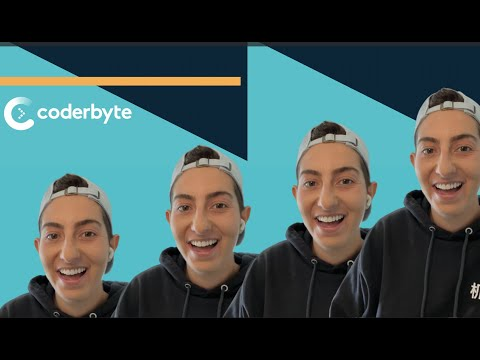

In [12]:
from IPython.display import YouTubeVideo, VimeoVideo, IFrame

id = 'aUuleLd0lwM'

YouTubeVideo(id=id, width=900, height=400)

In [13]:
def flatten_json(obj):
    ret = {}
    
    def flatten(x, flattened_key=""):
        if type(x) is dict:
            for current_key in x:
                flatten(x[current_key], flattened_key + current_key + '_')
        elif type(x) is list:
            i = 0
            for elem in x:
                flatten(elem, flattened_key + str(i) + '_')
                i +=1
                
        else:
            ret[flattened_key[:-1]] = x
            
    flatten(obj)
    return ret           

In [14]:
# apply the function to our JSON data
flatten_json(data)

{'type': 'FeatureCollection',
 'metadata_attribution': 'openrouteservice.org | OpenStreetMap contributors',
 'metadata_service': 'routing',
 'metadata_timestamp': 1690293608858,
 'metadata_query_coordinates_0_0': -122.4194,
 'metadata_query_coordinates_0_1': 37.7749,
 'metadata_query_coordinates_1_0': -73.944,
 'metadata_query_coordinates_1_1': 40.661,
 'metadata_query_profile': 'driving-car',
 'metadata_query_format': 'json',
 'metadata_engine_version': '7.1.0',
 'metadata_engine_build_date': '2023-07-09T01:31:50Z',
 'metadata_engine_graph_date': '2023-07-23T10:09:25Z',
 'bbox_0': -122.419446,
 'bbox_1': 37.774936,
 'bbox_2': -73.944025,
 'bbox_3': 41.789337,
 'features_0_bbox_0': -122.419446,
 'features_0_bbox_1': 37.774936,
 'features_0_bbox_2': -73.944025,
 'features_0_bbox_3': 41.789337,
 'features_0_type': 'Feature',
 'features_0_properties_transfers': 0,
 'features_0_properties_fare': 0,
 'features_0_properties_segments_0_distance': 4692230.9,
 'features_0_properties_segments_0_

The overall structure of the JSON file is clearer now.

### Save json response as a .JSON, normalize, and create a pandas DataFrame

 Another option is to save the JSON data as a `.json` file and normalize it prior to creating a pandas DataFrame :

In [17]:
# Write the JSON reponse to a JSON file
with open("data.json", "w") as outfile:
    json.dump(data, outfile)

In [18]:
# Load the JSON data from the file
with open('data.json') as f:
    data = json.load(f)

# Flatten the nested JSON data into a DataFrame
df = pd.json_normalize(data)
df

,type,bbox,features,metadata.attribution,metadata.service,metadata.timestamp,metadata.query.coordinates,metadata.query.profile,metadata.query.format,metadata.engine.version,metadata.engine.build_date,metadata.engine.graph_date
0,FeatureCollection,"[-122.419446, 37.774936, -73.944025, 41.789337]","[{'bbox': [-122.419446, 37.774936, -73.944025,...",openrouteservice.org | OpenStreetMap contributors,routing,1690293702794,"[[-122.4194, 37.7749], [-73.944, 40.661]]",driving-car,json,7.1.0,2023-07-09T01:31:50Z,2023-07-23T10:09:25Z


### Extracting info from JSON 

Extract the coordinates for the driving directions :

In [19]:
route= data['features'][0]['geometry']['coordinates']

In [20]:
route[:5] # first 5 values - equivalent to pandas .head()

[[-122.419446, 37.774936],
 [-122.41934, 37.77502],
 [-122.419176, 37.775164],
 [-122.418776, 37.775474],
 [-122.418675, 37.77555]]

### Caution!!! Folium requires coordinates in y,x !!!

The coordinates returned by OpenRouteService API is in the order [X,Y] (i.e. [Longitude, Latitude]) whereas Folium requires the coordinates in [Y,X] (i.e. [Latitude, Longitude]) order. We can swap them before plotting.

In [21]:
route_xy = []
for x, y in route:
    route_xy.append((y,x))
route_xy[:5]

[(37.774936, -122.419446),
 (37.77502, -122.41934),
 (37.775164, -122.419176),
 (37.775474, -122.418776),
 (37.77555, -122.418675)]

An easier way to accomplish the same is by using a Python [List Comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp).

In [22]:
route_xy = [(y, x) for x, y in route]
route_xy[:5]

[(37.774936, -122.419446),
 (37.77502, -122.41934),
 (37.775164, -122.419176),
 (37.775474, -122.418776),
 (37.77555, -122.418675)]

We extract the route summary returned by the API which contains the total driving distance in meters.

In [23]:
summary = data['features'][0]['properties']['summary']
distance = round(summary['distance']/1000)
tooltip = 'Driving Distance: {}km'.format(distance)

We can use the [`folium.vector_layers.Polyline`](https://python-visualization.github.io/folium/modules.html#folium.vector_layers.PolyLine) class to add a line to the map. The class has a `smooth_factor` parameter which can be used to simplify the line displayed when zoomed-out. Setting a higher number results in better performance.

In [24]:
folium.PolyLine(route_xy, tooltip=tooltip, smooth_factor=1).add_to(m) # setting a higher number results in better performance
m

Folium maps can be saved to a HTML file by calling `save()` on the map object.

In [ ]:
output_folder = 'output'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
output_path = os.path.join(output_folder, 'directions.html')
m.save(output_path)

## Exercise

Below is the complete code to create an interactive map with the driving directions between two cities. Replace the origin and destination with your chosen cities and create an interactive map.

In [ ]:
import folium
import requests

###############################
###  Replace Variables Below
###############################
origin = (37.7749, -122.4194)
origin_name = 'San Francisco'
destination = (40.661, -73.944)
destination_name = 'New York'
map_center = (39.83, -98.58)
ORS_API_KEY = ''
###############################
parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(origin[1], origin[0]),
    'end' : '{},{}'.format(destination[1], destination[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json()
else:
    print('Request failed.')

route= data['features'][0]['geometry']['coordinates']
summary = data['features'][0]['properties']['summary']

route_xy = [(y, x) for x, y in route]
distance = round(summary['distance']/1000)
tooltip = 'Driving Distance: {}km'.format(distance)

from folium import Figure
fig = Figure(width=800, height=400)

m = folium.Map(location=map_center, zoom_start=4)
folium.Marker(origin, popup=origin_name,
              icon=folium.Icon(
                  color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)
folium.Marker(destination, popup=destination_name,
              icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')
             ).add_to(m)
folium.PolyLine(route_xy, tooltip=tooltip).add_to(m)
fig.add_child(m)

## My Solution

In [31]:
## import folium
import requests

origin = (52.0705, 4.3007)
origin_name = 'The Hague'
destination = (50.0647, 19.9450)
destination_name = 'Krakow'
map_center = (51,12.1)
ORS_API_KEY = '5b3ce3597851110001cf624887990eaffad34abda73c4a4835b5da60'

parameters = {
    'api_key': ORS_API_KEY,
    'start' : '{},{}'.format(origin[1], origin[0]),
    'end' : '{},{}'.format(destination[1], destination[0])
}

response = requests.get(
    'https://api.openrouteservice.org/v2/directions/driving-car', params=parameters)

if response.status_code == 200:
    print('Request successful.')
    data = response.json()
else:
    print('Request failed.')

route= data['features'][0]['geometry']['coordinates']
summary = data['features'][0]['properties']['summary']

route_xy = [(y, x) for x, y in route]
distance = round(summary['distance']/1000)
tooltip = 'Driving Distance: {}km'.format(distance)

from folium import Figure

fig = Figure(width=800, height=400)

m = folium.Map(location=map_center, zoom_start=4)
folium.Marker(origin, popup=origin_name,
              icon=folium.Icon(
                  color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)

folium.Marker(destination, popup=destination_name,
              icon=folium.Icon(color='red', icon='crosshairs', prefix='fa')
             ).add_to(m)

folium.PolyLine(route_xy, tooltip=tooltip).add_to(m)
fig.add_child(m)

Request successful.
